In [1]:
import os,sys,json
from glob import glob

os.chdir('/home/avijit/projects/Awareness_vs_Unawareness')
sys.path.insert(0,"/home/avijit/projects/Awareness_vs_Unawareness/robustfairnesscode")

In [2]:
import warnings
warnings.filterwarnings('ignore')

from robustfairnesscode import data, losses, optimization, model, utils, dro_training, softweights_training
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import shap
import traceback

In [3]:
def writejson(path,arr,name):
    try:
        os.mkdir(path+'preds/')
    except:
        pass
    f = open(path+'preds/'+name,'w')
    json.dump(arr,f)
    f.close()

In [4]:
paths = {0:'data/datasets/law_school/',
         0.2:'data/datasets/law_school/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/law_school/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/law_school/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/law_school/synthetic/gender_flip_labels0.8_version0/'
        }

In [5]:
def dothings(model,name):
    session = tf.Session()
    session.run((tf.global_variables_initializer(),tf.local_variables_initializer()))
    
    def f(test_df):
        val = session.run(model.predictions_tensor,feed_dict=model.feed_dict_helper(test_df))
        vall = [float(v[0]) for v in val]
        val_m = [0 if i < 0 else 1 for i in vall]
        return val_m
    
    explainer = shap.Explainer(f, test_df)
    shap_values = explainer(test_df.sample(n=500))
    
    clist = list(FEATURE_NAMES)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    
    shap.plots.bar(shap_values,max_display=18)

Index(['isPartTime_No', 'isPartTime_Yes', 'sex_Female', 'sex_Male',
       'race_Black', 'race_Other', 'race_White', 'zfygpa', 'zgpa', 'DOByr',
       'weightedlsatugpa', 'clustertier', 'familyincome', 'lsat', 'ugpa',
       'pass_bar'],
      dtype='object')
Split 0 of 10
Time since start: 0.005041837692260742
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





best val objective: 0.2004
best val constraints: [-0.05, -0.05, -0.05, -0.05]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Time that this run took: 5.480090856552124
best_learning_rate_theta, 0.1
best_learning_rate_lambda 1
best_learning_rate_W 0.1
time i

Permutation explainer: 501it [00:31, 11.94it/s]                         


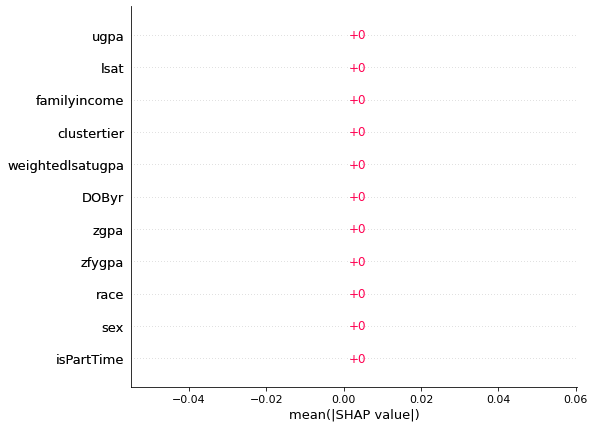

Split 1 of 1
time since start: 0.0352325439453125
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.4995975494384766
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 5.84436297416687
time since start: 5.8800742626190186
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.4815185070037842
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimi

Permutation explainer: 501it [00:28, 11.30it/s]                         


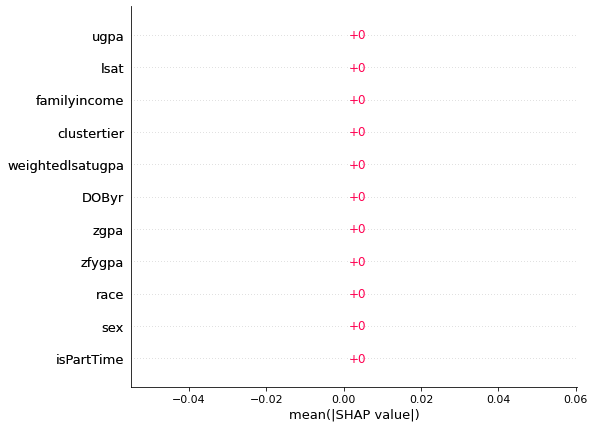

Index(['isPartTime_No', 'isPartTime_Yes', 'sex_Female', 'sex_Male',
       'race_Black', 'race_Other', 'race_White', 'zfygpa', 'zgpa', 'DOByr',
       'weightedlsatugpa', 'clustertier', 'familyincome', 'lsat', 'ugpa',
       'pass_bar'],
      dtype='object')
Split 0 of 10
Time since start: 0.004292964935302734
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.7948
best val constraints: [-0.05, -0.05, -0.05, -0.05]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Time that this run took: 5.533620595932007
best_learning_rate_theta, 0.1
best_learning_rate_lambda 1
best_learning_rate_W 0.1
time it took for this split 5.538971424102783
best true G constraint violations [-0.05, -0.05, -0.05, -0.05]
Split 1 of 10
Time since start: 5.543646574020386
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.28

Permutation explainer: 501it [00:41,  9.60it/s]                         


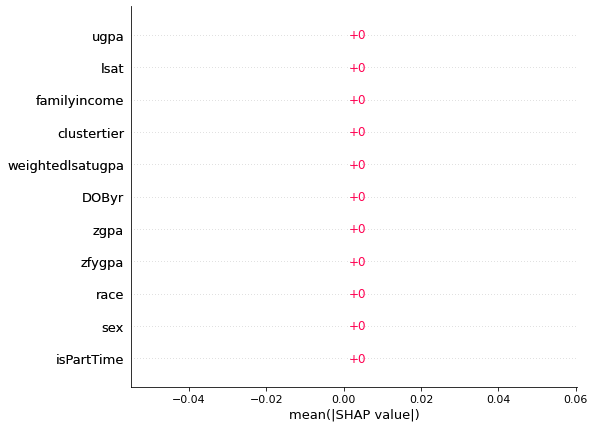

Split 1 of 1
time since start: 0.03517627716064453
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.493783950805664
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 6.04120397567749
time since start: 6.076815366744995
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.5443565845489502
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimiz

Permutation explainer: 501it [00:28, 11.28it/s]                         


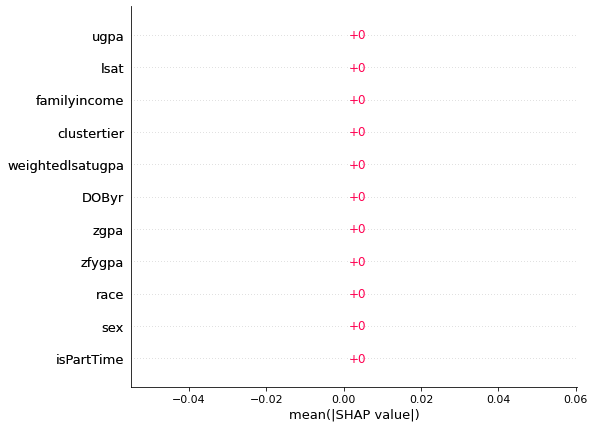

Index(['isPartTime_No', 'isPartTime_Yes', 'sex_Female', 'sex_Male',
       'race_Black', 'race_Other', 'race_White', 'zfygpa', 'zgpa', 'DOByr',
       'weightedlsatugpa', 'clustertier', 'familyincome', 'lsat', 'ugpa',
       'pass_bar'],
      dtype='object')
Split 0 of 10
Time since start: 0.004278421401977539
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.2006
best val constraints: [-0.05, -0.05, -0.05, -0.05]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Time that this run took: 5.682347297668457
best_learning_rate_theta, 0.1
best_learning_rate_lambda 1
best_learning_rate_W 0.1
time it took for this split 5.690113067626953
best true G constraint violations [-0.05, -0.05, -0.05, -0.05]
Split 1 of 10
Time since start: 5.695809602737427
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.19

Permutation explainer: 501it [00:28, 11.37it/s]                         


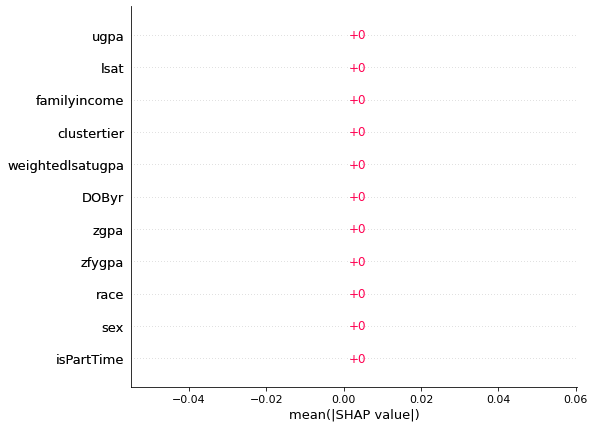

Split 1 of 1
time since start: 0.03574061393737793
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.5186529159545898
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 6.133698225021362
time since start: 6.169640302658081
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.5608575344085693
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optim

Permutation explainer: 501it [00:34, 11.35it/s]                         


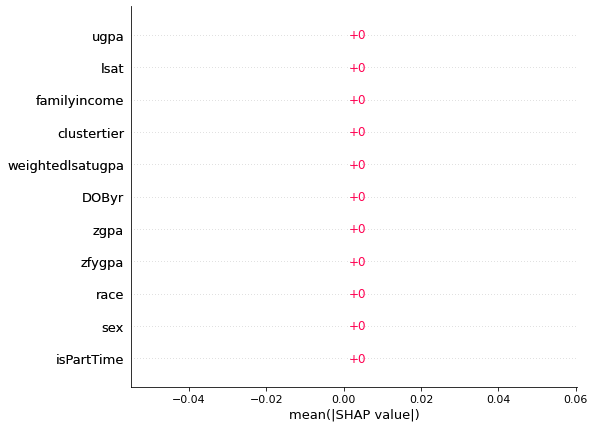

Index(['isPartTime_No', 'isPartTime_Yes', 'sex_Female', 'sex_Male',
       'race_Black', 'race_Other', 'race_White', 'zfygpa', 'zgpa', 'DOByr',
       'weightedlsatugpa', 'clustertier', 'familyincome', 'lsat', 'ugpa',
       'pass_bar'],
      dtype='object')
Split 0 of 10
Time since start: 0.00462031364440918
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.1991
best val constraints: [-0.05, -0.05, -0.05, -0.05]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Time that this run took: 5.622159957885742
best_learning_rate_theta, 0.1
best_learning_rate_lambda 1
best_learning_rate_W 0.1
time it took for this split 5.628819942474365
best true G constraint violations [-0.05, -0.05, -0.05, -0.05]
Split 1 of 10
Time since start: 5.634178161621094
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.196

Permutation explainer: 501it [00:28, 11.35it/s]                         


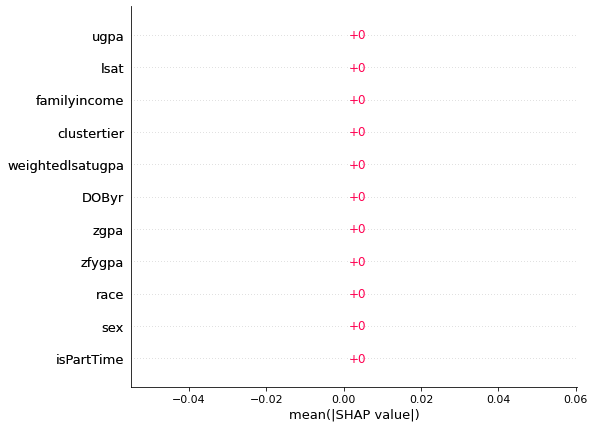

Split 1 of 1
time since start: 0.03452634811401367
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.499549388885498
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 6.013811826705933
time since start: 6.048782110214233
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.5317668914794922
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimi

Permutation explainer: 501it [00:29, 11.28it/s]                         


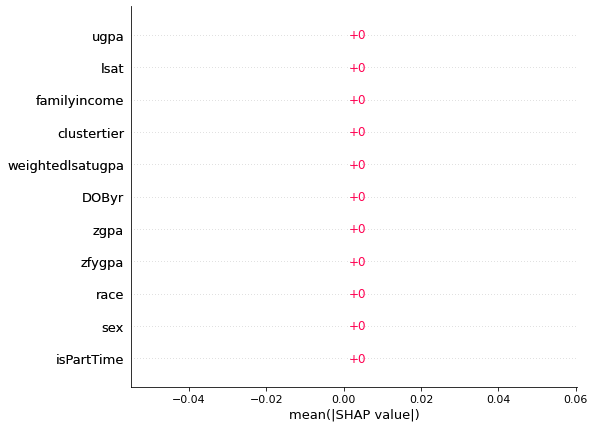

Index(['isPartTime_No', 'isPartTime_Yes', 'sex_Female', 'sex_Male',
       'race_Black', 'race_Other', 'race_White', 'zfygpa', 'zgpa', 'DOByr',
       'weightedlsatugpa', 'clustertier', 'familyincome', 'lsat', 'ugpa',
       'pass_bar'],
      dtype='object')
Split 0 of 10
Time since start: 0.00429081916809082
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.1977
best val constraints: [-0.05, -0.05, -0.05, -0.05]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Time that this run took: 5.643700361251831
best_learning_rate_theta, 0.1
best_learning_rate_lambda 1
best_learning_rate_W 0.1
time it took for this split 5.650012254714966
best true G constraint violations [-0.05, -0.05, -0.05, -0.05]
Split 1 of 10
Time since start: 5.655590295791626
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.204

Permutation explainer: 501it [00:35,  9.49it/s]                         


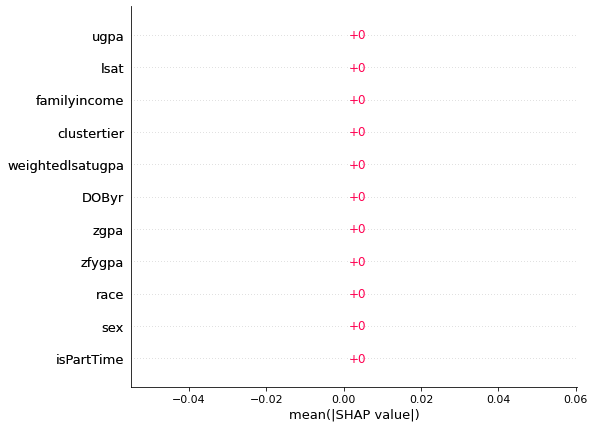

Split 1 of 1
time since start: 0.03544211387634277
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.518568754196167
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 6.024466276168823
time since start: 6.060357570648193
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.525627613067627
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
tpr_overall 1.0
fpr_overall 1.0
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimiz

Permutation explainer: 501it [00:28, 11.29it/s]                         


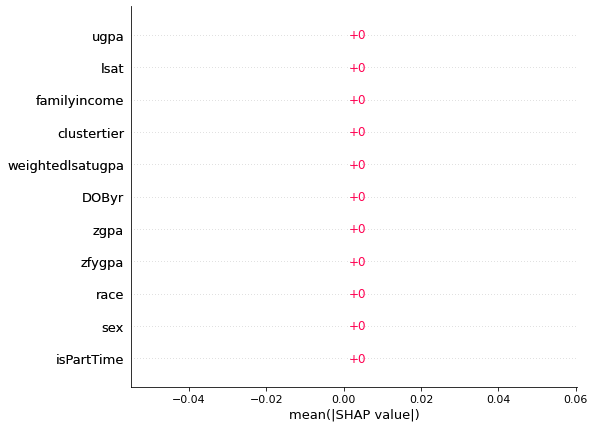

In [6]:
for frac in paths:
    path = paths[frac]
    
    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['zfygpa', 'zgpa', 'DOByr', 'weightedlsatugpa', 'clustertier',
           'familyincome', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
           'pass_bar']

    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['zfygpa', 'zgpa', 'DOByr', 'weightedlsatugpa', 'clustertier',
           'familyincome', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
           'pass_bar']

    X_train = train_df.drop(['pass_bar'],axis=1)
    X_test = test_df.drop(['pass_bar'],axis=1)

    Y_train = pd.Series(train_df['pass_bar'])
    Y_test = pd.Series(test_df['pass_bar'])

    Y_train = pd.Series(Y_train.factorize(sort=True)[0], index=Y_train.index)
    Y_test = pd.Series(Y_test.factorize(sort=True)[0], index=Y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    train_df  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    test_df = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    train_df['pass_bar'] = Y_train
    test_df['pass_bar'] = Y_test

    print(train_df.columns)

    LABEL_COLUMN = "pass_bar"
    FEATURE_NAMES = list(train_df.columns)
    FEATURE_NAMES.remove(LABEL_COLUMN)
    PROTECTED_COLUMNS = ['sex_Female','sex_Male']

    PROXY_COLUMNS = PROTECTED_COLUMNS  
    
    valmain2,best_learning_rate_theta2,best_learning_rate_lambda2,best_learning_rate_W2 = softweights_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                                       PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1, constraint='tpr_and_fpr')

    swmodel = softweights_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta2, 
                                                        learning_rate_lambda = best_learning_rate_lambda2, learning_rate_W = best_learning_rate_W2, num_loops = 1,constraint='tpr_and_fpr')


    name = 'law_school_soft_'+str(frac)
    
    dothings(swmodel,name)


    valmain,best_learning_rate_theta,best_learning_rate_lambda,best_learning_rate_p_list = dro_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                      PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1,constraint='tpr_and_fpr')

    model = dro_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta, 
                                                        learning_rate_lambda = best_learning_rate_lambda, learning_rate_p_list = best_learning_rate_p_list, num_loops = 1,constraint='tpr_and_fpr')

    name = 'law_school_mdro_'+str(frac)
    
    dothings(model,name)